In [ ]:
import pandas as pd
from dateutil import parser

# Cargar el CSV
df = pd.read_csv("datos_ventas.csv")

# Función para convertir fechas a YYYY-MM-DD
def convertir_fecha(fecha):
    try:
        return parser.parse(str(fecha)).strftime("%Y-%m-%d")
    except Exception:
        return None  # Devuelve None si la fecha no es válida

# Aplicar la función a la columna "fecha"
df["fecha"] = df["fecha"].apply(convertir_fecha)

# Guardar el CSV con las fechas convertidas
df.to_csv("datosVentas.csv", index=False)

print("Conversión completada. Guardado en 'datosVentas.csv'.")

In [ ]:
import mysql.connector
import pandas as pd

# Configurar la conexión a MySQL
conexion = mysql.connector.connect(
    host="localhost",      
    user="root",      
    password="",
    database="practica1"    
)

cursor = conexion.cursor()

# Cargar los datos del CSV
df = pd.read_csv("datosVentas.csv")

# Recorrer el DataFrame y actualizar la base de datos
for index, row in df.iterrows():
    cursor.execute("UPDATE ventas SET fecha = %s WHERE id_venta = %s", (row["fecha"], row["id_venta"]))

# Confirmar cambios y cerrar conexión
conexion.commit()
conexion.close()

print("Datos de fecha actualizados correctamente en la base de datos.")


In [ ]:
import pandas as pd
from sqlalchemy import create_engine

# Conectar a la base de datos (ajusta con tus credenciales)
engine = create_engine("mysql+pymysql://root:@localhost/practica1")

# Consulta SQL para obtener valores únicos de la columna
columna = "moneda"  # Cambia esto por la columna que necesites
tabla = "ventas"    # Cambia esto por tu tabla

query = f"SELECT DISTINCT {columna} FROM {tabla};"

# Leer los valores únicos en un DataFrame
df = pd.read_sql(query, engine)

# Mostrar los valores únicos
print(df[columna].tolist())  # Convertir a lista si solo necesitas los valores


In [ ]:
import mysql.connector

# Configuración de conexión a MySQL
conexion = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="practica1"
)
cursor = conexion.cursor()

# Tasas de conversión a USD
tasas_conversion = {
    "USD": 1.00,  # 1 USD = 1 USD
    "EUR": 1.10,  # 1 EUR = 1.10 USD
    "GBP": 1.30   # 1 GBP = 1.30 USD
}

# Obtener los datos de ventas y productos
cursor.execute("""
    SELECT ventas.id_venta, ventas.moneda, productos.id_producto, productos.precio_unitario 
    FROM ventas 
    JOIN productos ON ventas.id_producto = productos.id_producto
""")
datos = cursor.fetchall()

# Recorrer los datos y actualizar los precios y moneda
for id_venta, moneda, id_producto, precio_unitario in datos:
    if moneda in tasas_conversion:
        nuevo_precio = precio_unitario * tasas_conversion[moneda]

        # Actualizar el precio en la tabla productos
        cursor.execute("UPDATE productos SET precio_unitario = %s WHERE id_producto = %s", (nuevo_precio, id_producto))

        # Actualizar la moneda en la tabla ventas
        cursor.execute("UPDATE ventas SET moneda = 'USD' WHERE id_venta = %s", (id_venta,))

# Guardar cambios y cerrar conexión
conexion.commit()
conexion.close()

print("Conversión de monedas completada. Todos los precios están en USD.")


In [1]:
import mysql.connector

# Configuración de conexión a MySQL
conexion = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="practica1"
)
cursor = conexion.cursor()

# Actualizar los NULL en la columna cantidad a 0
cursor.execute("UPDATE ventas SET cantidad = 0 WHERE cantidad IS NULL")

# Guardar cambios y cerrar conexión
conexion.commit()
conexion.close()

print("Los valores NULL en la columna cantidad han sido reemplazados por 0.")


Los valores NULL en la columna cantidad han sido reemplazados por 0.


In [2]:
import mysql.connector

# Configuración de conexión a MySQL
conexion = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="practica1"
)
cursor = conexion.cursor()

# Paso 1: Agregar la columna total_venta si no existe
cursor.execute("ALTER TABLE ventas ADD COLUMN IF NOT EXISTS total_venta DECIMAL(10, 2)")

# Paso 2: Actualizar la columna total_venta
cursor.execute("""
    UPDATE ventas v
    JOIN productos p ON v.id_producto = p.id_producto
    SET v.total_venta = p.precio_unitario * v.cantidad
""")

# Guardar cambios y cerrar conexión
conexion.commit()
conexion.close()

print("La columna total_venta ha sido añadida y actualizada correctamente.")


La columna total_venta ha sido añadida y actualizada correctamente.


In [3]:
import mysql.connector

# Configuración de conexión a MySQL
conexion = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="practica1"
)
cursor = conexion.cursor()

# Consulta SQL para obtener los campos requeridos
consulta = """
    SELECT id_venta, fecha, cantidad, moneda, total_venta
    FROM ventas
"""
cursor.execute(consulta)

# Obtener y mostrar los resultados
resultados = cursor.fetchall()
for row in resultados:
    print(row)

# Cerrar conexión
conexion.close()


(1, '2023-10-01', 5, 'USD', Decimal('6002.50'))
(2, '2023-01-10', 3, 'USD', Decimal('2640.00'))
(3, '2023-10-02', 0, 'USD', Decimal('0.00'))
(4, '2023-02-10', 2, 'USD', Decimal('780.00'))
(5, '2023-10-03', 4, 'USD', Decimal('1000.00'))
(6, '2023-10-04', 1, 'USD', Decimal('55.00'))
(7, '2023-10-05', 3, 'USD', Decimal('75.00'))
(8, '2023-05-10', 0, 'USD', Decimal('0.00'))
(9, '2023-10-06', 2, 'USD', Decimal('240.00'))
(10, '2023-10-07', 5, 'USD', Decimal('110.00'))
(11, '2023-10-08', 4, 'USD', Decimal('2400.00'))
(12, '2023-08-10', 1, 'USD', Decimal('104.00'))
(13, '2023-10-09', 3, 'USD', Decimal('450.00'))
(14, '2023-10-10', 2, 'USD', Decimal('1100.00'))
(15, '2023-10-11', 0, 'USD', Decimal('0.00'))
(16, '2023-11-10', 4, 'USD', Decimal('3640.00'))
(17, '2023-10-12', 5, 'USD', Decimal('2000.00'))
(18, '2023-10-13', 1, 'USD', Decimal('66.00'))
(19, '2023-10-14', 3, 'USD', Decimal('90.00'))
(20, '2023-10-14', 2, 'USD', Decimal('234.00'))
(21, '2023-10-15', 4, 'USD', Decimal('280.00'))
(22,

In [7]:
import mysql.connector

# Configuración de conexión a MySQL
conexion = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="practica1"
)
cursor = conexion.cursor()

# Paso 1: Crear la nueva tabla dm_region_producto
cursor.execute("""
    CREATE TABLE IF NOT EXISTS dm_region_producto (
        id_venta INT AUTO_INCREMENT PRIMARY KEY,
        region VARCHAR(255),
        id_producto INT,
        nombre_producto TEXT,  # Ajustado para 'TEXT' tipo de la columna
        total_cantidad INT,
        total_venta DECIMAL(10, 2)
    )
""")

# Paso 2: Insertar datos consolidados en la nueva tabla
cursor.execute("""
    INSERT INTO dm_region_producto (region, id_producto, nombre_producto, total_cantidad, total_venta)
    SELECT v.region, v.id_producto, p.nombre, SUM(v.cantidad), SUM(v.total_venta)
    FROM ventas v
    JOIN productos p ON v.id_producto = p.id_producto
    GROUP BY v.region, v.id_producto
""")

# Guardar cambios y cerrar conexión
conexion.commit()
conexion.close()

print("Datos consolidados y tabla dm_region_producto creada.")


Datos consolidados y tabla dm_region_producto creada.


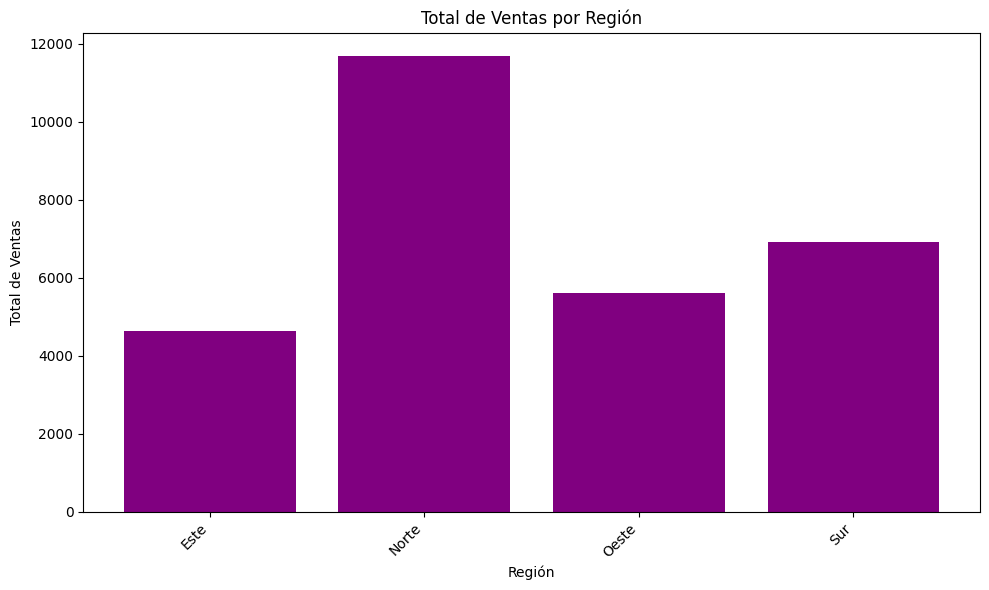

In [6]:
import mysql.connector
import matplotlib.pyplot as plt

# Conexión a la base de datos
conexion = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="practica1"
)
cursor = conexion.cursor()

# Obtener los datos de la tabla dm_region_producto
cursor.execute("""
    SELECT region, SUM(total_venta) AS total_ventas
    FROM dm_region_producto
    GROUP BY region
""")

# Almacenar los resultados
regiones = []
total_ventas = []

for region, total_venta in cursor.fetchall():
    regiones.append(region)
    total_ventas.append(total_venta)

# Cerrar la conexión
conexion.close()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(regiones, total_ventas, color='purple')

# Añadir etiquetas y título
plt.xlabel('Región')
plt.ylabel('Total de Ventas')
plt.title('Total de Ventas por Región')

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45, ha='right')

plt.savefig('graficoBarras.png', bbox_inches='tight')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


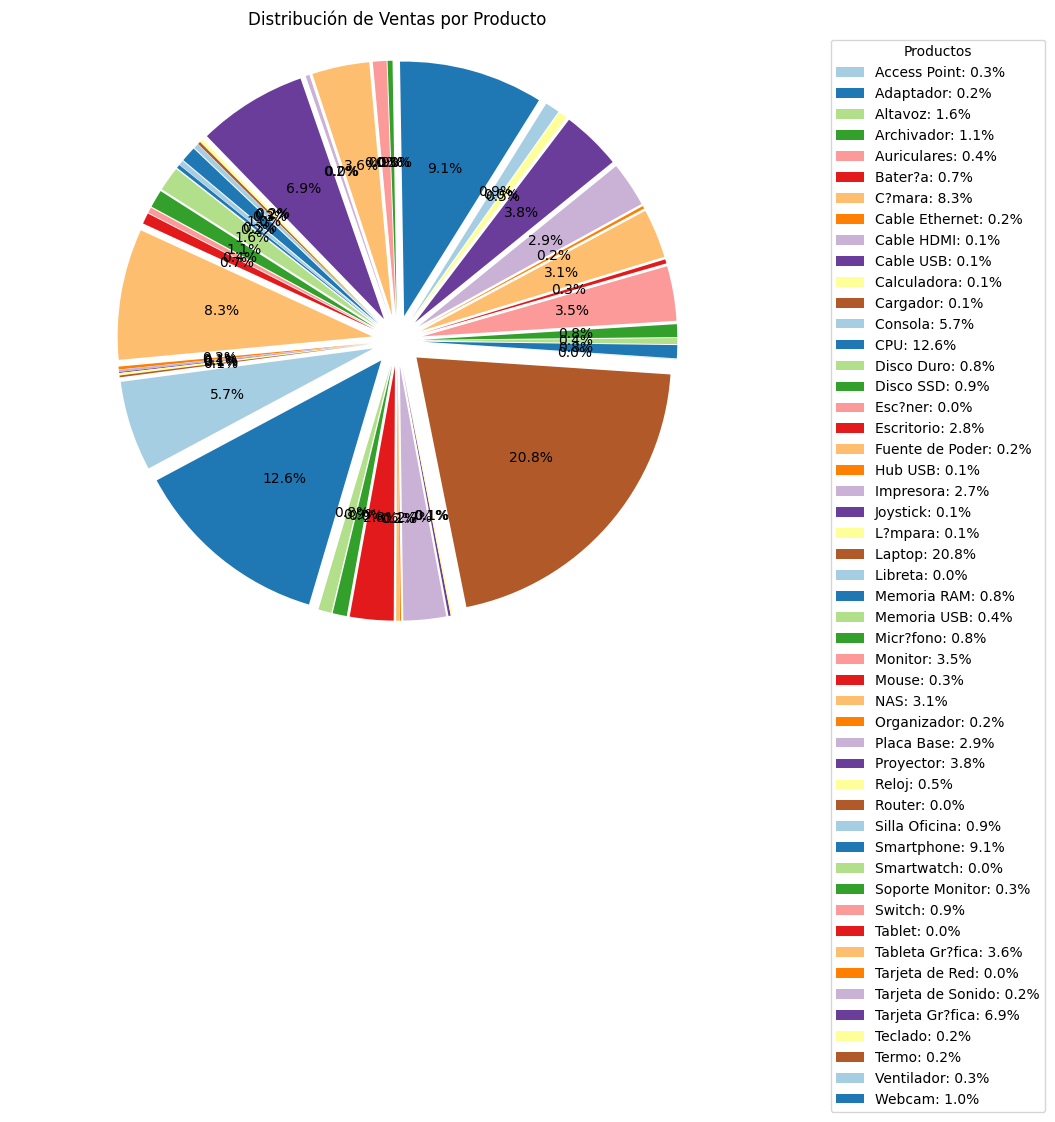

In [3]:
import mysql.connector
import matplotlib.pyplot as plt

# Conexión a la base de datos
conexion = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="practica1"
)
cursor = conexion.cursor()

# Obtener los datos de ventas por producto con la tabla productos
cursor.execute("""
    SELECT p.nombre, SUM(d.total_venta) AS total_ventas
    FROM dm_region_producto d
    JOIN productos p ON d.id_producto = p.id_producto
    GROUP BY p.nombre
""")

# Almacenar los resultados
productos = []
ventas = []

for nombre, total_venta in cursor.fetchall():
    productos.append(nombre)
    ventas.append(total_venta)

# Cerrar la conexión
conexion.close()

# Crear gráfico de pastel con ajustes
plt.figure(figsize=(10, 8))  # Aumentar el tamaño de la figura

# Crear el gráfico de pastel con separación (explode) y colores personalizados
explode = [0.1] * len(ventas)  # Separar todas las porciones
_, _, autotexts = plt.pie(ventas, labels=None, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors, explode=explode)

# Colocar los porcentajes en la leyenda
# Generar las etiquetas con los nombres de productos y sus respectivos porcentajes
leyenda = [f'{nombre}: {porcentaje}%' for nombre, porcentaje in zip(productos, [f'{v / sum(ventas) * 100:.1f}' for v in ventas])]

# Añadir una leyenda con las etiquetas
plt.legend(leyenda, title="Productos", bbox_to_anchor=(1.05, 1), loc='upper left')

# Añadir un título
plt.title('Distribución de Ventas por Producto')

plt.savefig('graficoPastelUniversal.png', bbox_inches='tight')

# Mostrar el gráfico
plt.axis('equal')  # Para asegurar que el gráfico sea circular
plt.show()


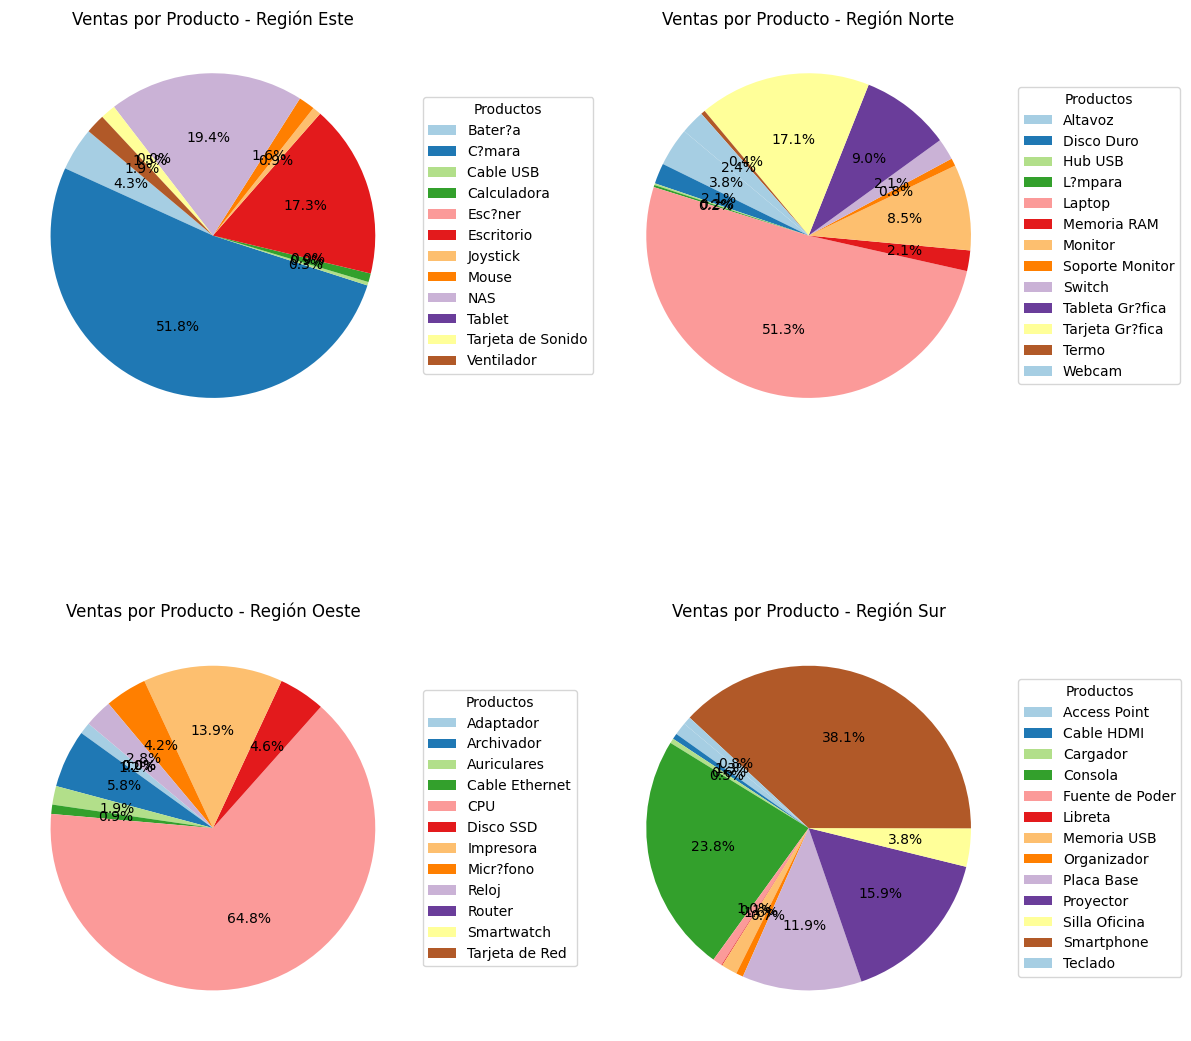

In [4]:
import mysql.connector
import matplotlib.pyplot as plt

# Conexión a la base de datos
conexion = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="practica1"
)
cursor = conexion.cursor()

# Obtener los datos de ventas por región y producto
cursor.execute("""
    SELECT v.region, p.nombre, SUM(v.total_venta) AS total_ventas
    FROM ventas v
    JOIN productos p ON v.id_producto = p.id_producto
    GROUP BY v.region, p.nombre
""")

# Almacenar los resultados
regiones = {}
for region, nombre, total_venta in cursor.fetchall():
    if region not in regiones:
        regiones[region] = []
    regiones[region].append((nombre, total_venta))

# Cerrar la conexión
conexion.close()

# Crear un grid de 2x2 para las 4 gráficas de pastel
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Aplanar la matriz de ejes para acceder fácilmente a cada gráfico
axes = axes.flatten()

# Para cada región, crear un gráfico de pastel en su respectiva subgráfica
for i, (region, datos) in enumerate(regiones.items()):
    productos = [nombre for nombre, _ in datos]
    ventas = [total_venta for _, total_venta in datos]

    # Colores para los productos
    colores = plt.cm.Paired.colors[:len(productos)]

    # Crear gráfico de pastel en cada subgráfico solo con los porcentajes y sin etiquetas
    wedges, _, autotexts = axes[i].pie(ventas, autopct='%1.1f%%', startangle=140, colors=colores)

    # Eliminar etiquetas de nombres
    for text in autotexts:
        text.set_visible(True)  # Asegurar que solo los porcentajes sean visibles

    axes[i].set_title(f'Ventas por Producto - Región {region}')

    # Crear una leyenda fuera del gráfico de pastel
    axes[i].legend(wedges, productos, title="Productos", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)

plt.savefig('graficoBarras.png', bbox_inches='tight')

# Ajustar el espacio entre los subgráficos y la tabla
plt.tight_layout()

# Mostrar el gráfico
plt.show()

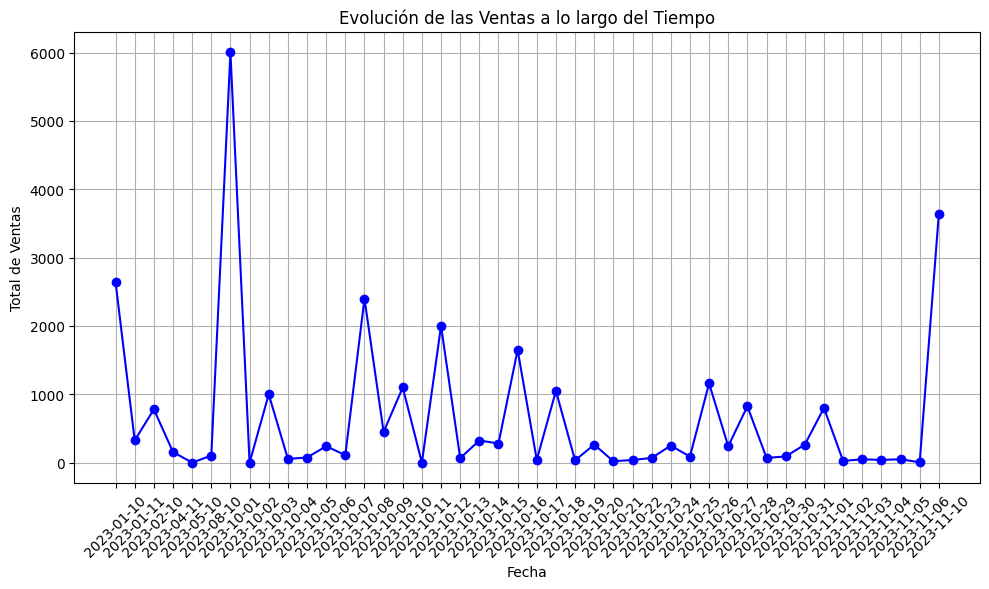

In [5]:
import mysql.connector
import matplotlib.pyplot as plt

# Conexión a la base de datos
conexion = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="practica1"
)
cursor = conexion.cursor()

# Obtener los datos de ventas a lo largo del tiempo (por ejemplo, por fecha)
cursor.execute("""
    SELECT v.fecha, SUM(v.total_venta) AS total_ventas
    FROM ventas v
    GROUP BY v.fecha
    ORDER BY v.fecha
""")

# Almacenar los resultados
fechas = []
ventas = []
for fecha, total_venta in cursor.fetchall():
    fechas.append(fecha)
    ventas.append(total_venta)

# Cerrar la conexión
conexion.close()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(fechas, ventas, marker='o', color='b', linestyle='-', label='Ventas')

# Configurar el título y las etiquetas
plt.title('Evolución de las Ventas a lo largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Total de Ventas')
plt.xticks(rotation=45)  # Rotar las fechas para que se vean mejor
plt.grid(True)

plt.savefig('graficoTiempo.png', bbox_inches='tight')

# Mostrar el gráfico
plt.tight_layout()
plt.show()
